# Ibraheem Omer (F2020-150)
## CSC-321 Artificial Intelligence
### Final Project

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import nltk
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import demoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from nltk.stem import LancasterStemmer
import pickle

Import File

In [2]:
df = pd.read_csv('Daraz Reviews.csv')
df.head()

,Sentiments,Reviews
0,neutral,Original product and delivery was on time. Pac...
1,positive,Full original quality is owsome with warranty ...
2,neutral,Looks beautiful and real
3,neutral,"Watch is really nice, it’s original as per my ..."
4,negative,I have returned this package due very low qual...


Converting Sentiments Column To Lower Case

In [3]:
df['Sentiments'] = df['Sentiments'].str.lower()

In [4]:
df['Sentiments'].value_counts()

positive     4686
negative     2450
neutral      1477
negative      184
posiitve        7
neutal          1
negtaive        1
Name: Sentiments, dtype: int64

Corresting Spelling Mistakes in Sentiments Column

In [5]:
df['Sentiments'] = df['Sentiments'].str.strip()

df['Sentiments'] = df['Sentiments'].replace(['posiitve'],'positive')
df['Sentiments'] = df['Sentiments'].replace(['negtaive'],'negative')
df['Sentiments'] = df['Sentiments'].replace(['neutal'],'neutral')

df['Sentiments'].value_counts()

positive    4693
negative    2635
neutral     1478
Name: Sentiments, dtype: int64

Histogram For Different Sentiments

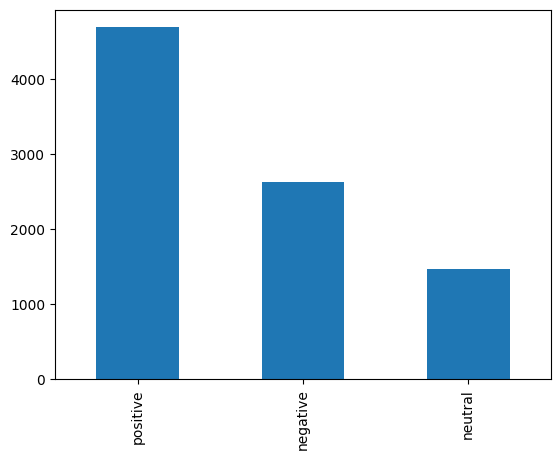

In [6]:
df['Sentiments'].value_counts().plot(kind='bar')
plt.show()

Removing Repeated Reviews

In [7]:
df = df.drop_duplicates(subset='Reviews', keep='first')
df = df.reset_index(drop=True)
df['Sentiments'].value_counts()

positive    4532
negative    2565
neutral     1447
Name: Sentiments, dtype: int64

Histogram After Removing Duplicated Reviews

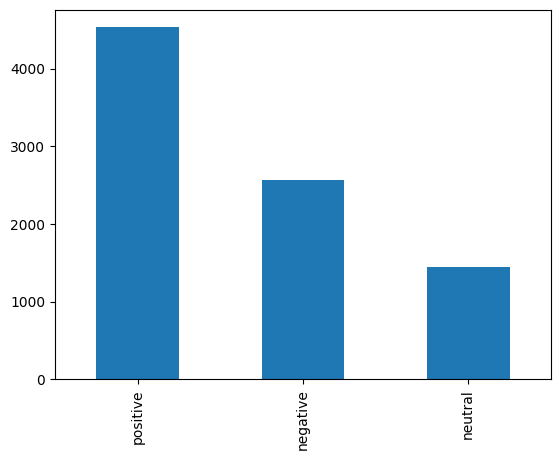

In [8]:
df['Sentiments'].value_counts().plot(kind='bar')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8545 entries, 0 to 8544
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiments  8544 non-null   object
 1   Reviews     8545 non-null   object
dtypes: object(2)
memory usage: 133.6+ KB


Dropping Rows With No Values

In [10]:
df = df.dropna(subset=['Sentiments'])
df = df.reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiments  8544 non-null   object
 1   Reviews     8544 non-null   object
dtypes: object(2)
memory usage: 133.6+ KB


Replacing 'positive' with 0, 'neutral' with 1 and 'negative' with 2

In [12]:
df = df.replace(['positive','neutral','negative'],[0,1,2])
df.head()

,Sentiments,Reviews
0,1,Original product and delivery was on time. Pac...
1,0,Full original quality is owsome with warranty ...
2,1,Looks beautiful and real
3,1,"Watch is really nice, it’s original as per my ..."
4,2,I have returned this package due very low qual...


In [13]:
df['Sentiments'].value_counts()

0    4532
2    2565
1    1447
Name: Sentiments, dtype: int64

Shuffling Dataset

In [14]:
df = df.sample(frac = 1)
df.head()

,Sentiments,Reviews
7544,1,i like it but a bit expensive
7023,0,Product is the same as shown in the picture. T...
2362,2,"quality is not good, gel doesn't work as demon..."
6131,0,Product quality:10/10
4886,1,good product but quantity is not good


Function To Correct Spelling Mistakes (Rejected)

In [15]:
def correct_spellings(text):
    b = TextBlob(text)
    return str(b.correct())

In [66]:
# df['Reviews'] = df['Reviews'].apply(correct_spellings)

# df.head()

Dataset Size After Cleaning

In [16]:
print("Dataset size:",len(df))

Dataset size: 8544


Features Extraction (Rejected)

In [68]:
# corpus = []
# stop_words = set(stopwords.words('english'))
# stemmer = LancasterStemmer()
# tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# for review in df['Reviews']:
#     review = review.lower()
    
#     review = demoji.replace_with_desc(review)
    
#     tokens = tokenizer.tokenize(review)
#     filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
#     processed_review = ' '.join(filtered_tokens)
    
#     corpus.append(processed_review)


Features Extraction

In [17]:
# def text_process(rev):
#     STOPWORDS = stopwords.words( 'english')

#     rev = rev.lower()

#     rev = ''.join([char for char in rev if char not in string.punctuation])

#     rev = re.sub(r'([a-z])\1+', r'\1', rev)

#     rev = re.sub(r'\s+', ' ', rev)

#     stemmer = PorterStemmer()
#     stemmed = [stemmer.stem(word) for word in rev.split()]

#     processed_text = ' '.join(
#         [word for word in stemmed if word.lower() not in STOPWORDS])
    
#     return processed_text

In [18]:
# df['updated_reviews'] = df.Reviews.apply(text_process)

In [19]:
df['Reviews'] = df['Reviews'].str.lower()

Data Transformation

In [20]:
tfidf = TfidfVectorizer()
le = LabelEncoder()

X = tfidf.fit_transform(df['Reviews']).toarray()
y = le.fit_transform(df['Sentiments'])

In [21]:
with open('tfidf_model.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

In [22]:
with open('label_model.pkl', 'wb') as file:
    pickle.dump(le, file)

Saving Processed Dataset To CSV File

In [23]:
df_X = pd.DataFrame(X, columns=tfidf.get_feature_names_out())
df_y = pd.DataFrame(y, columns=['Sentiments'])

# Concatenate 'X' and 'y' DataFrames horizontally
df_processed = pd.concat([df_X, df_y], axis=1)

# Save the processed samples to a CSV file
df_processed.to_csv('Processed_Dataset.csv', index=False)

Splitting the Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Decison Tree Classifier

In [77]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [78]:
dt_test_predictions = dt_clf.predict(X_test)

dt_f1_score = f1_score(y_test, dt_test_predictions, average='weighted')

print("Decison Tree Classifier Report\n", classification_report(y_test, dt_test_predictions))

Decison Tree Classifier Report
               precision    recall  f1-score   support

           0       0.70      0.93      0.80       915
           1       0.55      0.53      0.54       276
           2       0.73      0.32      0.45       518

    accuracy                           0.68      1709
   macro avg       0.66      0.59      0.60      1709
weighted avg       0.69      0.68      0.65      1709



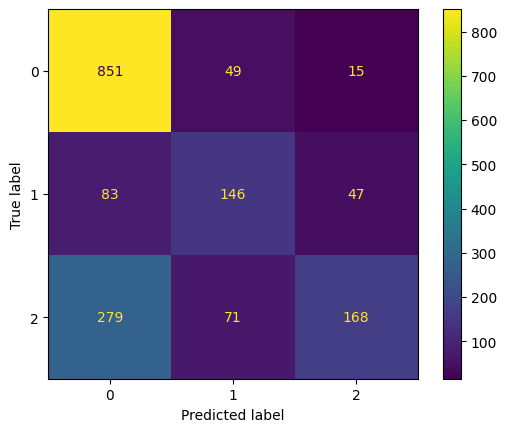

In [79]:
dt_cm = confusion_matrix(y_test, dt_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=le.classes_)
CM.plot()

Random Forest Classifier

In [80]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
rf_test_predictions = rf_clf.predict(X_test)

rf_f1_score = f1_score(y_test, rf_test_predictions, average='weighted')

print("Random Forest Classifier Report\n", classification_report(y_test, rf_test_predictions))

Random Forest Classifier Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       915
           1       0.75      0.45      0.56       276
           2       0.81      0.86      0.84       518

    accuracy                           0.84      1709
   macro avg       0.81      0.75      0.77      1709
weighted avg       0.83      0.84      0.83      1709



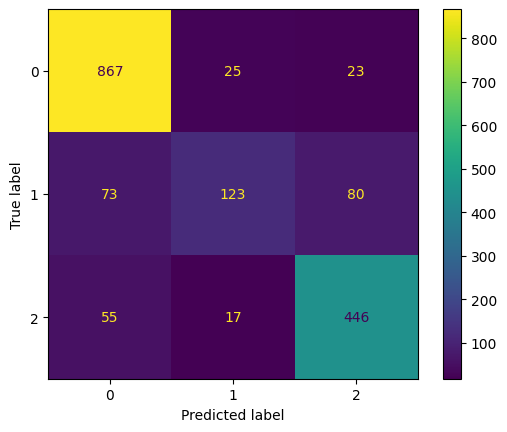

In [82]:
rf_cm = confusion_matrix(y_test, rf_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=le.classes_)
CM.plot()

K-Neighbors Classifier

In [83]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
knn_test_predictions = knn_clf.predict(X_test)

knn_f1_score = f1_score(y_test, knn_test_predictions, average='weighted')

print("KNN Classifier Report\n", classification_report(y_test, knn_test_predictions))

KNN Classifier Report
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       915
           1       0.55      0.36      0.44       276
           2       0.83      0.65      0.73       518

    accuracy                           0.77      1709
   macro avg       0.72      0.66      0.67      1709
weighted avg       0.76      0.77      0.75      1709



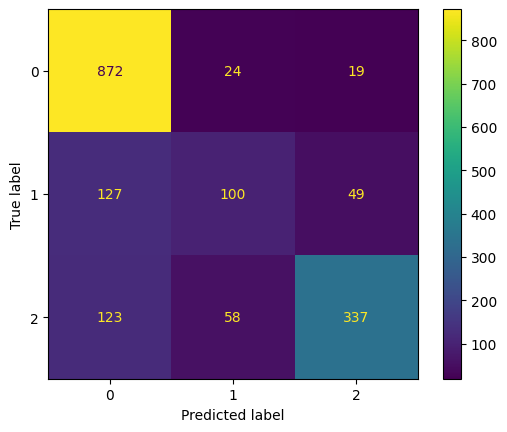

In [85]:
knn_cm = confusion_matrix(y_test, knn_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=le.classes_)
CM.plot()

Gaussian Naive Bayes Classifier

In [86]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [87]:
gnb_test_predictions = gnb_clf.predict(X_test)

gnb_f1_score = f1_score(y_test, gnb_test_predictions, average='weighted')

print("Gaussian Naive Bayes Classifier Report\n", classification_report(y_test, gnb_test_predictions))

Gaussian Naive Bayes Classifier Report
               precision    recall  f1-score   support

           0       0.77      0.32      0.45       915
           1       0.18      0.63      0.28       276
           2       0.63      0.44      0.51       518

    accuracy                           0.41      1709
   macro avg       0.53      0.46      0.42      1709
weighted avg       0.63      0.41      0.44      1709



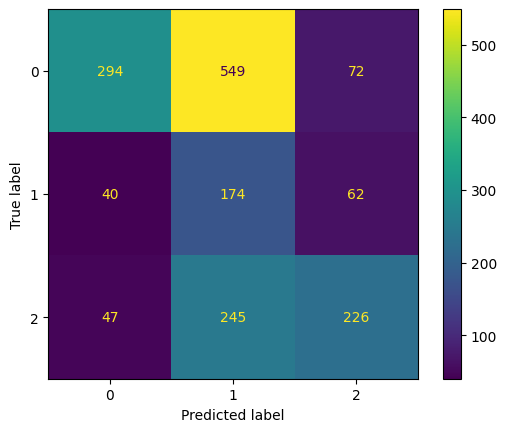

In [88]:
gnb_cm = confusion_matrix(y_test, gnb_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=le.classes_)
CM.plot()

Gradient Boosting Classifier

In [89]:
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [90]:
gb_test_predictions = gb_clf.predict(X_test)

gb_f1_score = f1_score(y_test, gb_test_predictions, average='weighted')

print("Gradient Boosting Classifier Report\n", classification_report(y_test, gb_test_predictions))

Gradient Boosting Classifier Report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       915
           1       0.69      0.60      0.64       276
           2       0.86      0.75      0.80       518

    accuracy                           0.83      1709
   macro avg       0.80      0.76      0.78      1709
weighted avg       0.83      0.83      0.82      1709



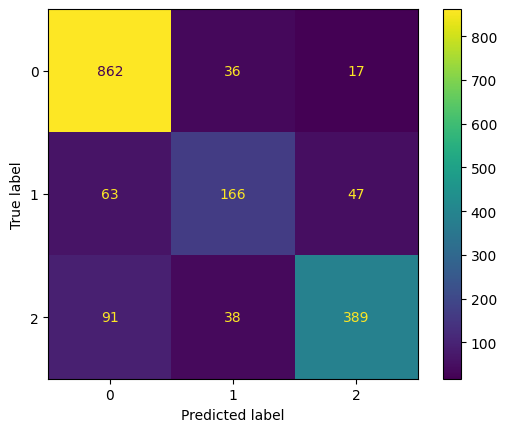

In [91]:
gb_cm = confusion_matrix(y_test, gb_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=le.classes_)
CM.plot()

XG Boost Classifier

In [92]:
xgb_clf = XGBClassifier(random_state=42, n_estimators=100)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [93]:
xgb_test_predictions = xgb_clf.predict(X_test)

xgb_f1_score = f1_score(y_test, xgb_test_predictions, average='weighted')

print("XGBoost Classifier Report\n", classification_report(y_test, xgb_test_predictions))

XGBoost Classifier Report
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       915
           1       0.70      0.59      0.64       276
           2       0.85      0.86      0.85       518

    accuracy                           0.86      1709
   macro avg       0.82      0.80      0.81      1709
weighted avg       0.85      0.86      0.86      1709



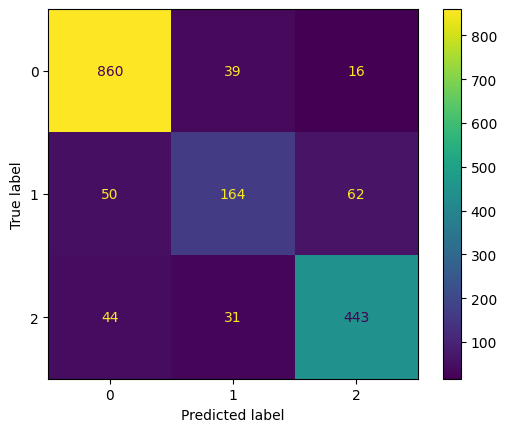

In [94]:
xgb_cn = confusion_matrix(y_test, xgb_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=xgb_cn, display_labels=le.classes_)
CM.plot()

AdaBoost Classifier

In [95]:
ada_clf = AdaBoostClassifier(random_state=42, n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [96]:
ada_test_predictions = ada_clf.predict(X_test)

ada_f1_score = f1_score(y_test, ada_test_predictions, average='weighted')

print("AdaBoost Classifier Report\n", classification_report(y_test, ada_test_predictions))

AdaBoost Classifier Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       915
           1       0.64      0.58      0.60       276
           2       0.83      0.77      0.80       518

    accuracy                           0.82      1709
   macro avg       0.78      0.76      0.76      1709
weighted avg       0.82      0.82      0.82      1709



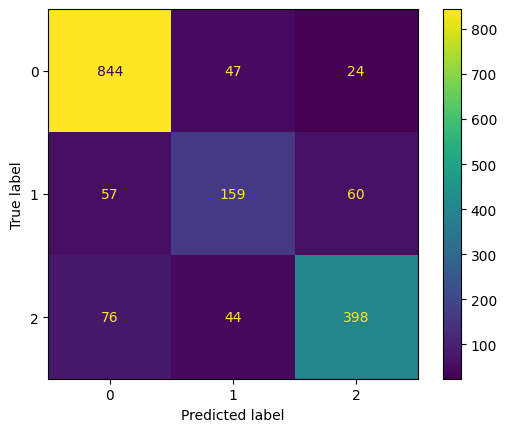

In [97]:
ada_cm = confusion_matrix(y_test, ada_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=ada_cm, display_labels=le.classes_)
CM.plot()

Logistic Regression Classifier

In [98]:
logis_clf = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=1000)
logis_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [99]:
logis_test_predictions = logis_clf.predict(X_test)

logis_f1_score = f1_score(y_test, logis_test_predictions, average='weighted')

print("Logistic Regression Classifier Report\n", classification_report(y_test, logis_test_predictions))

Logistic Regression Classifier Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       915
           1       0.73      0.58      0.65       276
           2       0.85      0.89      0.87       518

    accuracy                           0.87      1709
   macro avg       0.83      0.81      0.82      1709
weighted avg       0.87      0.87      0.87      1709



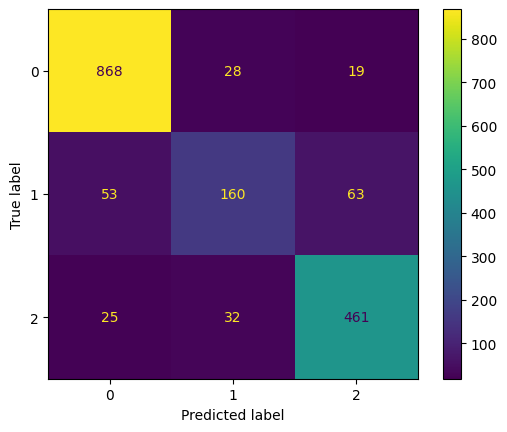

In [100]:
logis_cm = confusion_matrix(y_test, logis_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=logis_cm, display_labels=le.classes_)
CM.plot()

SVM Classifier

In [101]:
svm_clf = svm.SVC(kernel="linear", gamma=0.7, C=1, probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=1, gamma=0.7, kernel='linear', probability=True, random_state=42)

In [102]:
svm_test_predictions = svm_clf.predict(X_test)

svm_f1_score = f1_score(y_test, svm_test_predictions, average='weighted')

print("SVM Classifier Report\n", classification_report(y_test, svm_test_predictions))

SVM Classifier Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       915
           1       0.70      0.61      0.65       276
           2       0.86      0.90      0.88       518

    accuracy                           0.87      1709
   macro avg       0.83      0.82      0.82      1709
weighted avg       0.87      0.87      0.87      1709



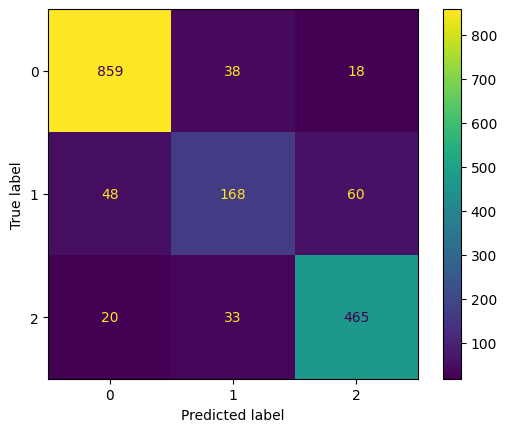

In [103]:
svm_cm = confusion_matrix(y_test, svm_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=le.classes_)
CM.plot()

Multinomial Naive Bayes

In [104]:
multinomial_nb_clf = MultinomialNB()
multinomial_nb_clf.fit(X_train, y_train)

MultinomialNB()

In [105]:
multinomial_nb_test_predictions = multinomial_nb_clf.predict(X_test)

multinomial_nb_f1_score = f1_score(y_test, multinomial_nb_test_predictions, average='weighted')

print("Multinomial Naive Bayes Classifier Report\n", classification_report(y_test, multinomial_nb_test_predictions))

Multinomial Naive Bayes Classifier Report
               precision    recall  f1-score   support

           0       0.76      0.98      0.86       915
           1       0.81      0.11      0.19       276
           2       0.83      0.78      0.80       518

    accuracy                           0.78      1709
   macro avg       0.80      0.63      0.62      1709
weighted avg       0.79      0.78      0.73      1709



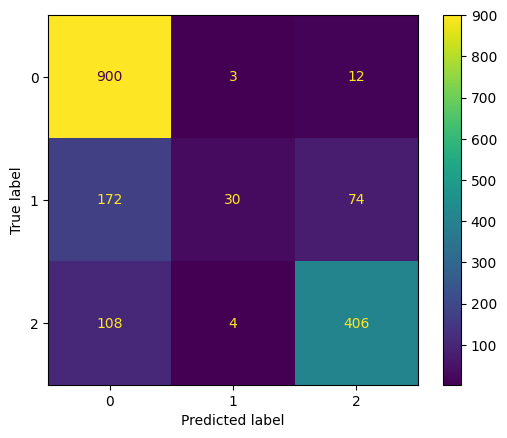

In [106]:
nb_cm = confusion_matrix(y_test, multinomial_nb_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=le.classes_)

CM.plot()

Weighted F1 Score For All Classifiers Implemented

In [107]:
classifiers = [
    ("Decision Tree", dt_f1_score),
    ("Random Forest", rf_f1_score),
    ("KNN", knn_f1_score),
    ("Gaussian Naive Bayes", gnb_f1_score),
    ("Gradient Boosting", gb_f1_score),
    ("XGBoost", xgb_f1_score),
    ("AdaBoost", ada_f1_score),
    ("Logistic Regression", logis_f1_score),
    ("SVM", svm_f1_score),
    ("Multinomial Naive Bayes", multinomial_nb_f1_score)
]

print("{:<25} {:<15}".format("Classifier", "Weighted F1 Score"))

for clf, score in classifiers:
    print("{:<25} {:<15.4f}".format(clf, score))

Classifier                Weighted F1 Score
Decision Tree             0.6514         
Random Forest             0.8295         
KNN                       0.7502         
Gaussian Naive Bayes      0.4441         
Gradient Boosting         0.8248         
XGBoost                   0.8551         
AdaBoost                  0.8166         
Logistic Regression       0.8670         
SVM                       0.8704         
Multinomial Naive Bayes   0.7346         


SVM CLassifier Hyperparameter Tuning

In [108]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.5, 0.7, 1.0],
}

svm_clf = svm.SVC(kernel="linear", probability=True, random_state=42)

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters: ", best_params)

Training SVM Classifier Using Best Hyperparameter

In [25]:
final_svm = svm.SVC(kernel="linear", C=1, gamma=0.1, probability=True, random_state=42)
final_svm.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear', probability=True, random_state=42)

In [ ]:
final_svm_test_predictions = final_svm.predict(X_test)

final_svm_f1_score = f1_score(y_test, final_svm_test_predictions, average='weighted')

print("Final SVM Classifier Report\n", classification_report(y_test, final_svm_test_predictions))

Final SVM Classifier Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       915
           1       0.70      0.61      0.65       276
           2       0.86      0.90      0.88       518

    accuracy                           0.87      1709
   macro avg       0.83      0.82      0.82      1709
weighted avg       0.87      0.87      0.87      1709



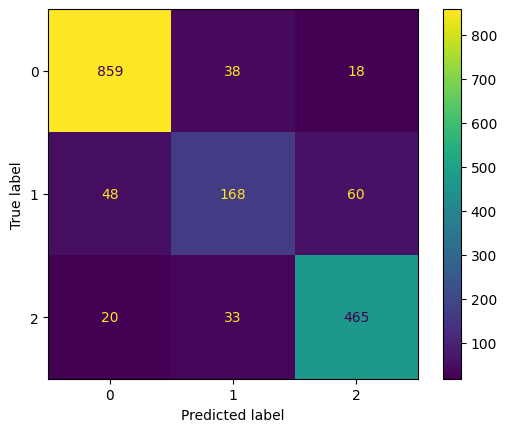

In [ ]:
final_svm_cm = confusion_matrix(y_test, final_svm_test_predictions)

CM = ConfusionMatrixDisplay(confusion_matrix=final_svm_cm, display_labels=le.classes_)
CM.plot()

Neural Network - Variation 1

In [112]:
nn_model_1 = keras.Sequential([layers.Dense(6812,activation="relu")
                          , layers.Dense(3  ,activation = "softmax")])

In [113]:
nn_model_1.compile(optimizer = "adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [114]:
nn_model_1.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
214/214 [==============================] - 102s 471ms/step - loss: 0.4672 - accuracy: 0.8198
Epoch 2/10
214/214 [==============================] - 110s 515ms/step - loss: 0.1708 - accuracy: 0.9459
Epoch 3/10
214/214 [==============================] - 102s 478ms/step - loss: 0.0792 - accuracy: 0.9788
Epoch 4/10
214/214 [==============================] - 103s 480ms/step - loss: 0.0425 - accuracy: 0.9883
Epoch 5/10
214/214 [==============================] - 102s 477ms/step - loss: 0.0281 - accuracy: 0.9928
Epoch 6/10
214/214 [==============================] - 103s 481ms/step - loss: 0.0173 - accuracy: 0.9944
Epoch 7/10
214/214 [==============================] - 102s 477ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 8/10
214/214 [==============================] - 102s 479ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 9/10
214/214 [==============================] - 102s 478ms/step - loss: 0.0110 - accuracy: 0.9965
Epoch 10/10
214/214 [==============================] - 104s 485m

In [115]:
test_loss, test_acc = nn_model_1.evaluate(X_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_acc: {test_acc}")

54/54 [==============================] - 2s 41ms/step - loss: 0.6277 - accuracy: 0.8444
test_loss: 0.6276531219482422
test_acc: 0.844353437423706


54/54 [==============================] - 2s 37ms/step


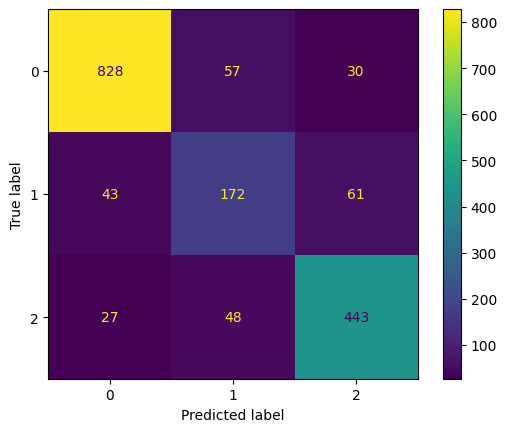

In [116]:
nn_model_1_pred = nn_model_1.predict(X_test)

nn_model_1_pred = np.argmax(nn_model_1_pred, axis=1)

nn_model_1_cm = confusion_matrix(y_test, nn_model_1_pred)

CM = ConfusionMatrixDisplay(confusion_matrix=nn_model_1_cm, display_labels=le.classes_)
CM.plot()

In [117]:
y_pred = nn_model_1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

54/54 [==============================] - 2s 45ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       915
           1       0.62      0.62      0.62       276
           2       0.83      0.86      0.84       518

    accuracy                           0.84      1709
   macro avg       0.79      0.79      0.79      1709
weighted avg       0.85      0.84      0.84      1709



Neural Network - Variation 2

In [118]:
nn_model_2 = keras.Sequential([
    layers.Dense(6812, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [119]:
nn_model_2.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [120]:
nn_model_2.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
214/214 [==============================] - 115s 529ms/step - loss: 0.4689 - accuracy: 0.8227
Epoch 2/10
214/214 [==============================] - 111s 518ms/step - loss: 0.1534 - accuracy: 0.9522
Epoch 3/10
214/214 [==============================] - 113s 526ms/step - loss: 0.0625 - accuracy: 0.9808
Epoch 4/10
214/214 [==============================] - 113s 527ms/step - loss: 0.0322 - accuracy: 0.9899
Epoch 5/10
214/214 [==============================] - 109s 507ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 6/10
214/214 [==============================] - 108s 503ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 7/10
214/214 [==============================] - 109s 511ms/step - loss: 0.0105 - accuracy: 0.9960
Epoch 8/10
214/214 [==============================] - 106s 497ms/step - loss: 0.0074 - accuracy: 0.9969
Epoch 9/10
214/214 [==============================] - 106s 495ms/step - loss: 0.0070 - accuracy: 0.9971
Epoch 10/10
214/214 [==============================] - 106s 494m

In [121]:
test_loss, test_acc = nn_model_2.evaluate(X_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_acc: {test_acc}")

54/54 [==============================] - 3s 53ms/step - loss: 0.7221 - accuracy: 0.8637
test_loss: 0.7220689058303833
test_acc: 0.8636629581451416


54/54 [==============================] - 3s 55ms/step


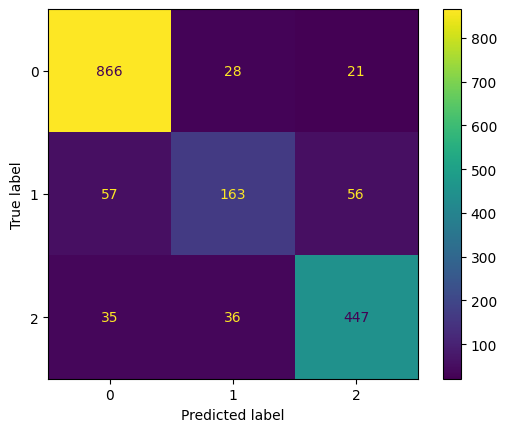

In [122]:
nn_model_2_pred = nn_model_2.predict(X_test)

nn_model_2_pred = np.argmax(nn_model_2_pred, axis=1)

nn_model_2_cm = confusion_matrix(y_test, nn_model_2_pred)

CM = ConfusionMatrixDisplay(confusion_matrix=nn_model_2_cm, display_labels=le.classes_)
CM.plot()

In [123]:
y_pred = nn_model_2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

54/54 [==============================] - 3s 48ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       915
           1       0.72      0.59      0.65       276
           2       0.85      0.86      0.86       518

    accuracy                           0.86      1709
   macro avg       0.83      0.80      0.81      1709
weighted avg       0.86      0.86      0.86      1709



Neural Network - Variation 3

In [124]:
nn_model_3 = keras.Sequential([
    layers.Dense(6812, activation="tanh"),
    layers.Dense(3, activation="softmax")
])

In [125]:
nn_model_3.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [126]:
nn_model_3.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
214/214 [==============================] - 100s 459ms/step - loss: 0.4624 - accuracy: 0.8202
Epoch 2/10
214/214 [==============================] - 100s 465ms/step - loss: 0.1989 - accuracy: 0.9402
Epoch 3/10
214/214 [==============================] - 100s 466ms/step - loss: 0.1313 - accuracy: 0.9644
Epoch 4/10
214/214 [==============================] - 100s 466ms/step - loss: 0.1090 - accuracy: 0.9703
Epoch 5/10
214/214 [==============================] - 100s 467ms/step - loss: 0.0933 - accuracy: 0.9753
Epoch 6/10
214/214 [==============================] - 102s 474ms/step - loss: 0.0832 - accuracy: 0.9786
Epoch 7/10
214/214 [==============================] - 100s 469ms/step - loss: 0.0737 - accuracy: 0.9800
Epoch 8/10
214/214 [==============================] - 100s 466ms/step - loss: 0.0704 - accuracy: 0.9826
Epoch 9/10
214/214 [==============================] - 99s 464ms/step - loss: 0.0678 - accuracy: 0.9827
Epoch 10/10
214/214 [==============================] - 108s 504ms

In [127]:
test_loss, test_acc = nn_model_3.evaluate(X_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_acc: {test_acc}")

54/54 [==============================] - 3s 47ms/step - loss: 0.7614 - accuracy: 0.8122
test_loss: 0.7613632082939148
test_acc: 0.8121708631515503


54/54 [==============================] - 3s 48ms/step


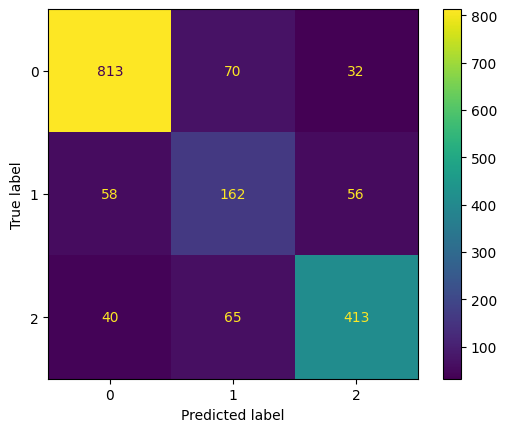

In [128]:
nn_model_3_pred = nn_model_3.predict(X_test)

nn_model_3_pred = np.argmax(nn_model_3_pred, axis=1)

nn_model_3_cm = confusion_matrix(y_test, nn_model_3_pred)

CM = ConfusionMatrixDisplay(confusion_matrix=nn_model_3_cm, display_labels=le.classes_)
CM.plot()

In [129]:
y_pred = nn_model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

54/54 [==============================] - 3s 50ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       915
           1       0.55      0.59      0.57       276
           2       0.82      0.80      0.81       518

    accuracy                           0.81      1709
   macro avg       0.75      0.76      0.76      1709
weighted avg       0.82      0.81      0.81      1709



Neural Network - Variation 4

In [138]:
nn_model_4 = keras.Sequential([
    layers.Dense(6812, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [139]:
nn_model_4.compile(optimizer="sgd",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [140]:
nn_model_4.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
214/214 [==============================] - 43s 196ms/step - loss: 1.0355 - accuracy: 0.5216
Epoch 2/10
214/214 [==============================] - 41s 194ms/step - loss: 0.9920 - accuracy: 0.5292
Epoch 3/10
214/214 [==============================] - 39s 182ms/step - loss: 0.9801 - accuracy: 0.5292
Epoch 4/10
214/214 [==============================] - 37s 173ms/step - loss: 0.9707 - accuracy: 0.5292
Epoch 5/10
214/214 [==============================] - 37s 171ms/step - loss: 0.9604 - accuracy: 0.5292
Epoch 6/10
214/214 [==============================] - 37s 175ms/step - loss: 0.9493 - accuracy: 0.5292
Epoch 7/10
214/214 [==============================] - 39s 184ms/step - loss: 0.9369 - accuracy: 0.5290
Epoch 8/10
214/214 [==============================] - 37s 175ms/step - loss: 0.9230 - accuracy: 0.5292
Epoch 9/10
214/214 [==============================] - 38s 178ms/step - loss: 0.9076 - accuracy: 0.5308
Epoch 10/10
214/214 [==============================] - 35s 164ms/step - l

In [141]:
test_loss, test_acc = nn_model_4.evaluate(X_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_acc: {test_acc}")

54/54 [==============================] - 2s 38ms/step - loss: 0.8757 - accuracy: 0.5424
test_loss: 0.8756880164146423
test_acc: 0.5424224734306335


54/54 [==============================] - 2s 38ms/step


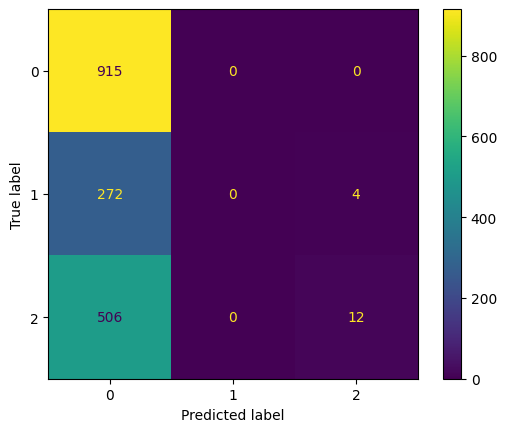

In [142]:
nn_model_4_pred = nn_model_4.predict(X_test)

nn_model_4_pred = np.argmax(nn_model_4_pred, axis=1)

nn_model_4_cm = confusion_matrix(y_test, nn_model_4_pred)

CM = ConfusionMatrixDisplay(confusion_matrix=nn_model_4_cm, display_labels=le.classes_)
CM.plot()

In [143]:
y_pred = nn_model_4.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

54/54 [==============================] - 2s 41ms/step
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       915
           1       0.00      0.00      0.00       276
           2       0.75      0.02      0.04       518

    accuracy                           0.54      1709
   macro avg       0.43      0.34      0.25      1709
weighted avg       0.52      0.54      0.39      1709



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Saving PKL File

In [26]:
with open('Ibraheem-Omer(SVM).pkl', 'wb') as f:
    pickle.dump(final_svm, f)

Testing PKL File

In [27]:
with open('Ibraheem-Omer(SVM).pkl', 'rb') as f:
    testing = pickle.load(f)

final_test_prediction = testing.predict(X_test)

print("Final SVM Classifier Report\n", classification_report(y_test, final_test_prediction))

Final SVM Classifier Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       903
           1       0.78      0.71      0.74       299
           2       0.86      0.88      0.87       507

    accuracy                           0.88      1709
   macro avg       0.85      0.84      0.85      1709
weighted avg       0.88      0.88      0.88      1709

